# Zillow Home Value Index (Updated Monthly)

This notebook explores the zillow home value index.

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
import seaborn as sns

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

plt.style.use('fivethirtyeight')

from itertools import cycle
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# Read In Data

In [ ]:
import psycopg2 as pg
import pandas as pd

HOSTNAME='trialsandbox.sandbox.aws.yellowbrickcloud.com'
USER='<sandboxusername>'
PASSWORD='<sandboxpassword>'
DBNAME='<sandboxdatabasenname>'


connQ=pg.connect(host=HOSTNAME, dbname=DBNAME, user=USER, password=PASSWORD)
cursor = connQ.cursor()
cursor.execute(f'select * from zillowhvi.hvibyyear')
table_data = cursor.fetchall()
cursor.close()
connQ.close()

In [ ]:
#Reshape Data Frame
df = pd.DataFrame(table_data, columns=[desc[0] for desc in cursor.description])
df = df.pivot_table(index='idxyear',columns='idxstate',values='idxvalue', fill_value=0)
df.columns = [s1.strip() for s1 in df.columns.tolist()]
df.reset_index(inplace=True)
zstate=df

# Correlation Matrix
Some states are more correlated than others.

<Axes: >

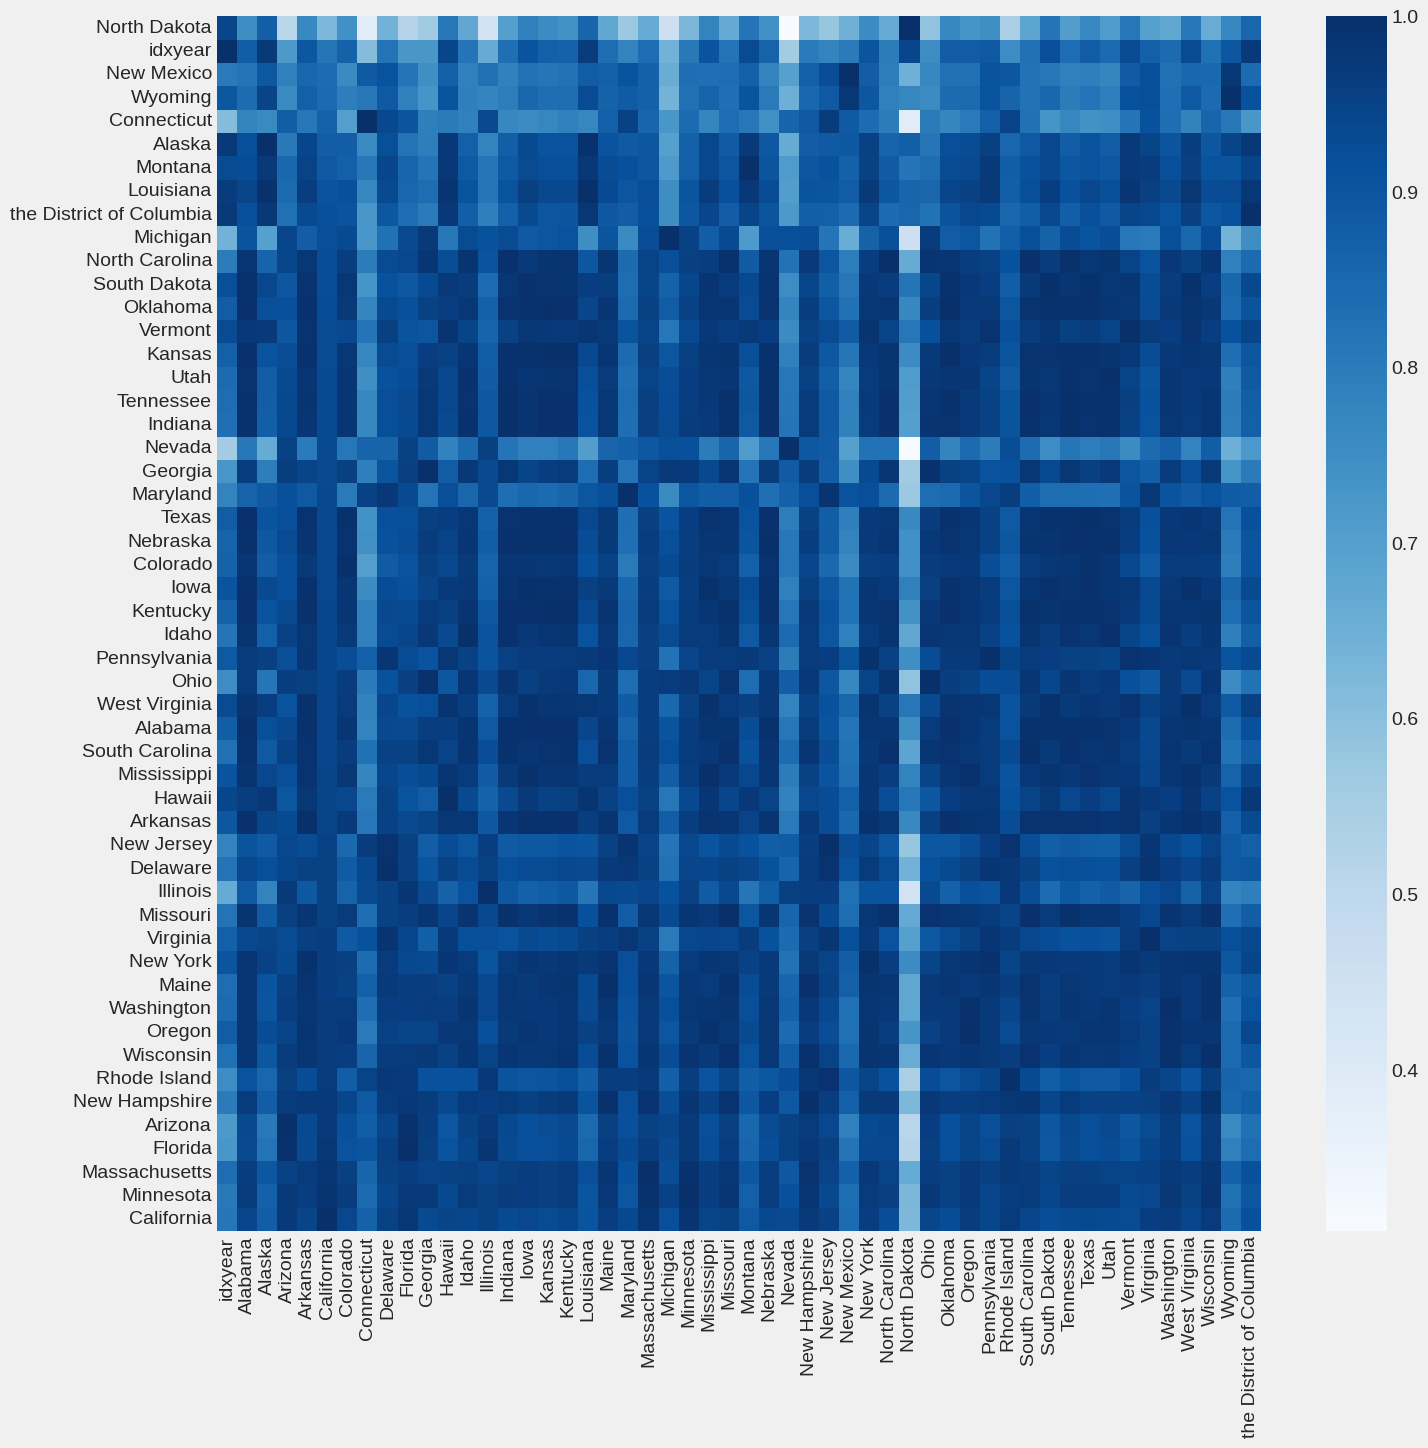

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(zstate.corr().sort_values('California'), cmap='Blues')

# Highly Correlated and Uncorrelated State Home Index

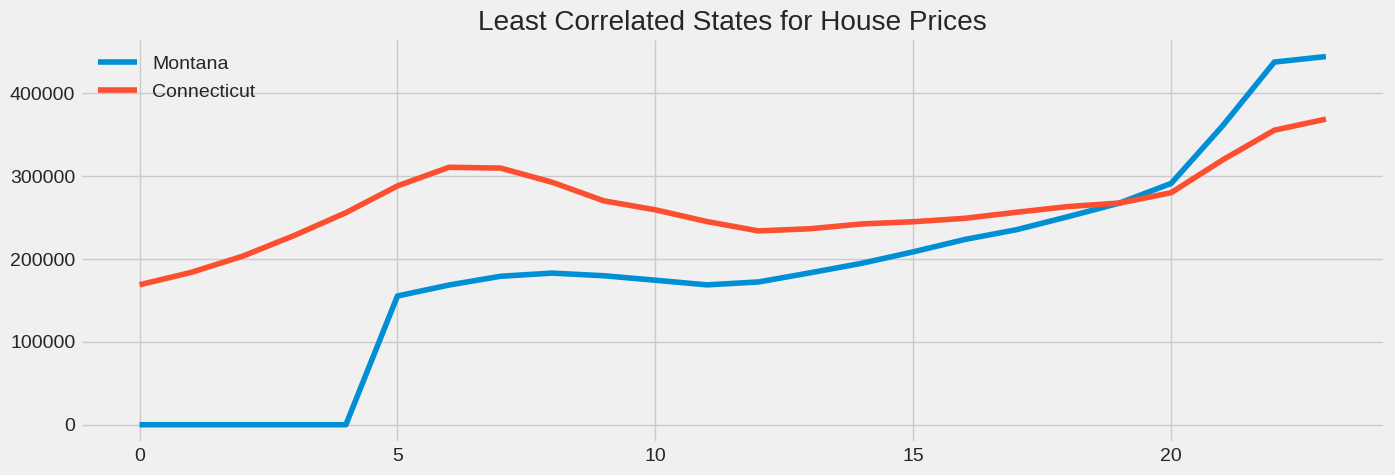

In [ ]:
zstate[['Montana','Connecticut']] \
    .plot(figsize=(15, 5),
          title='Least Correlated States for House Prices')
plt.show()

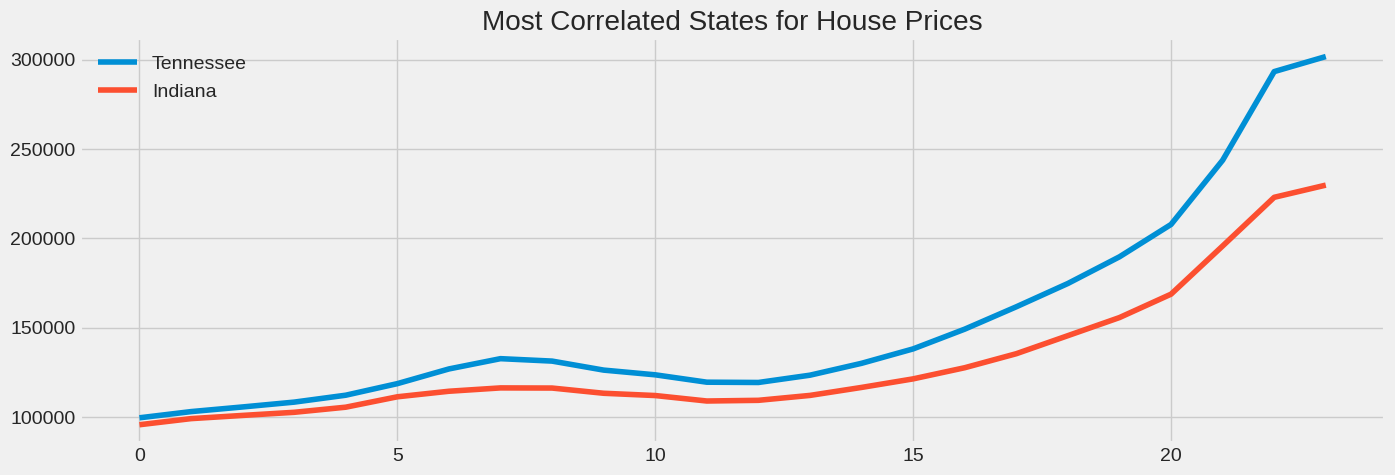

In [ ]:
zstate[['Tennessee','Indiana']] \
    .plot(figsize=(15, 5),
          title='Most Correlated States for House Prices')
plt.show()

# Plot The Zillow Home Index of Each State

Plot the time series plot of each state next to each other.

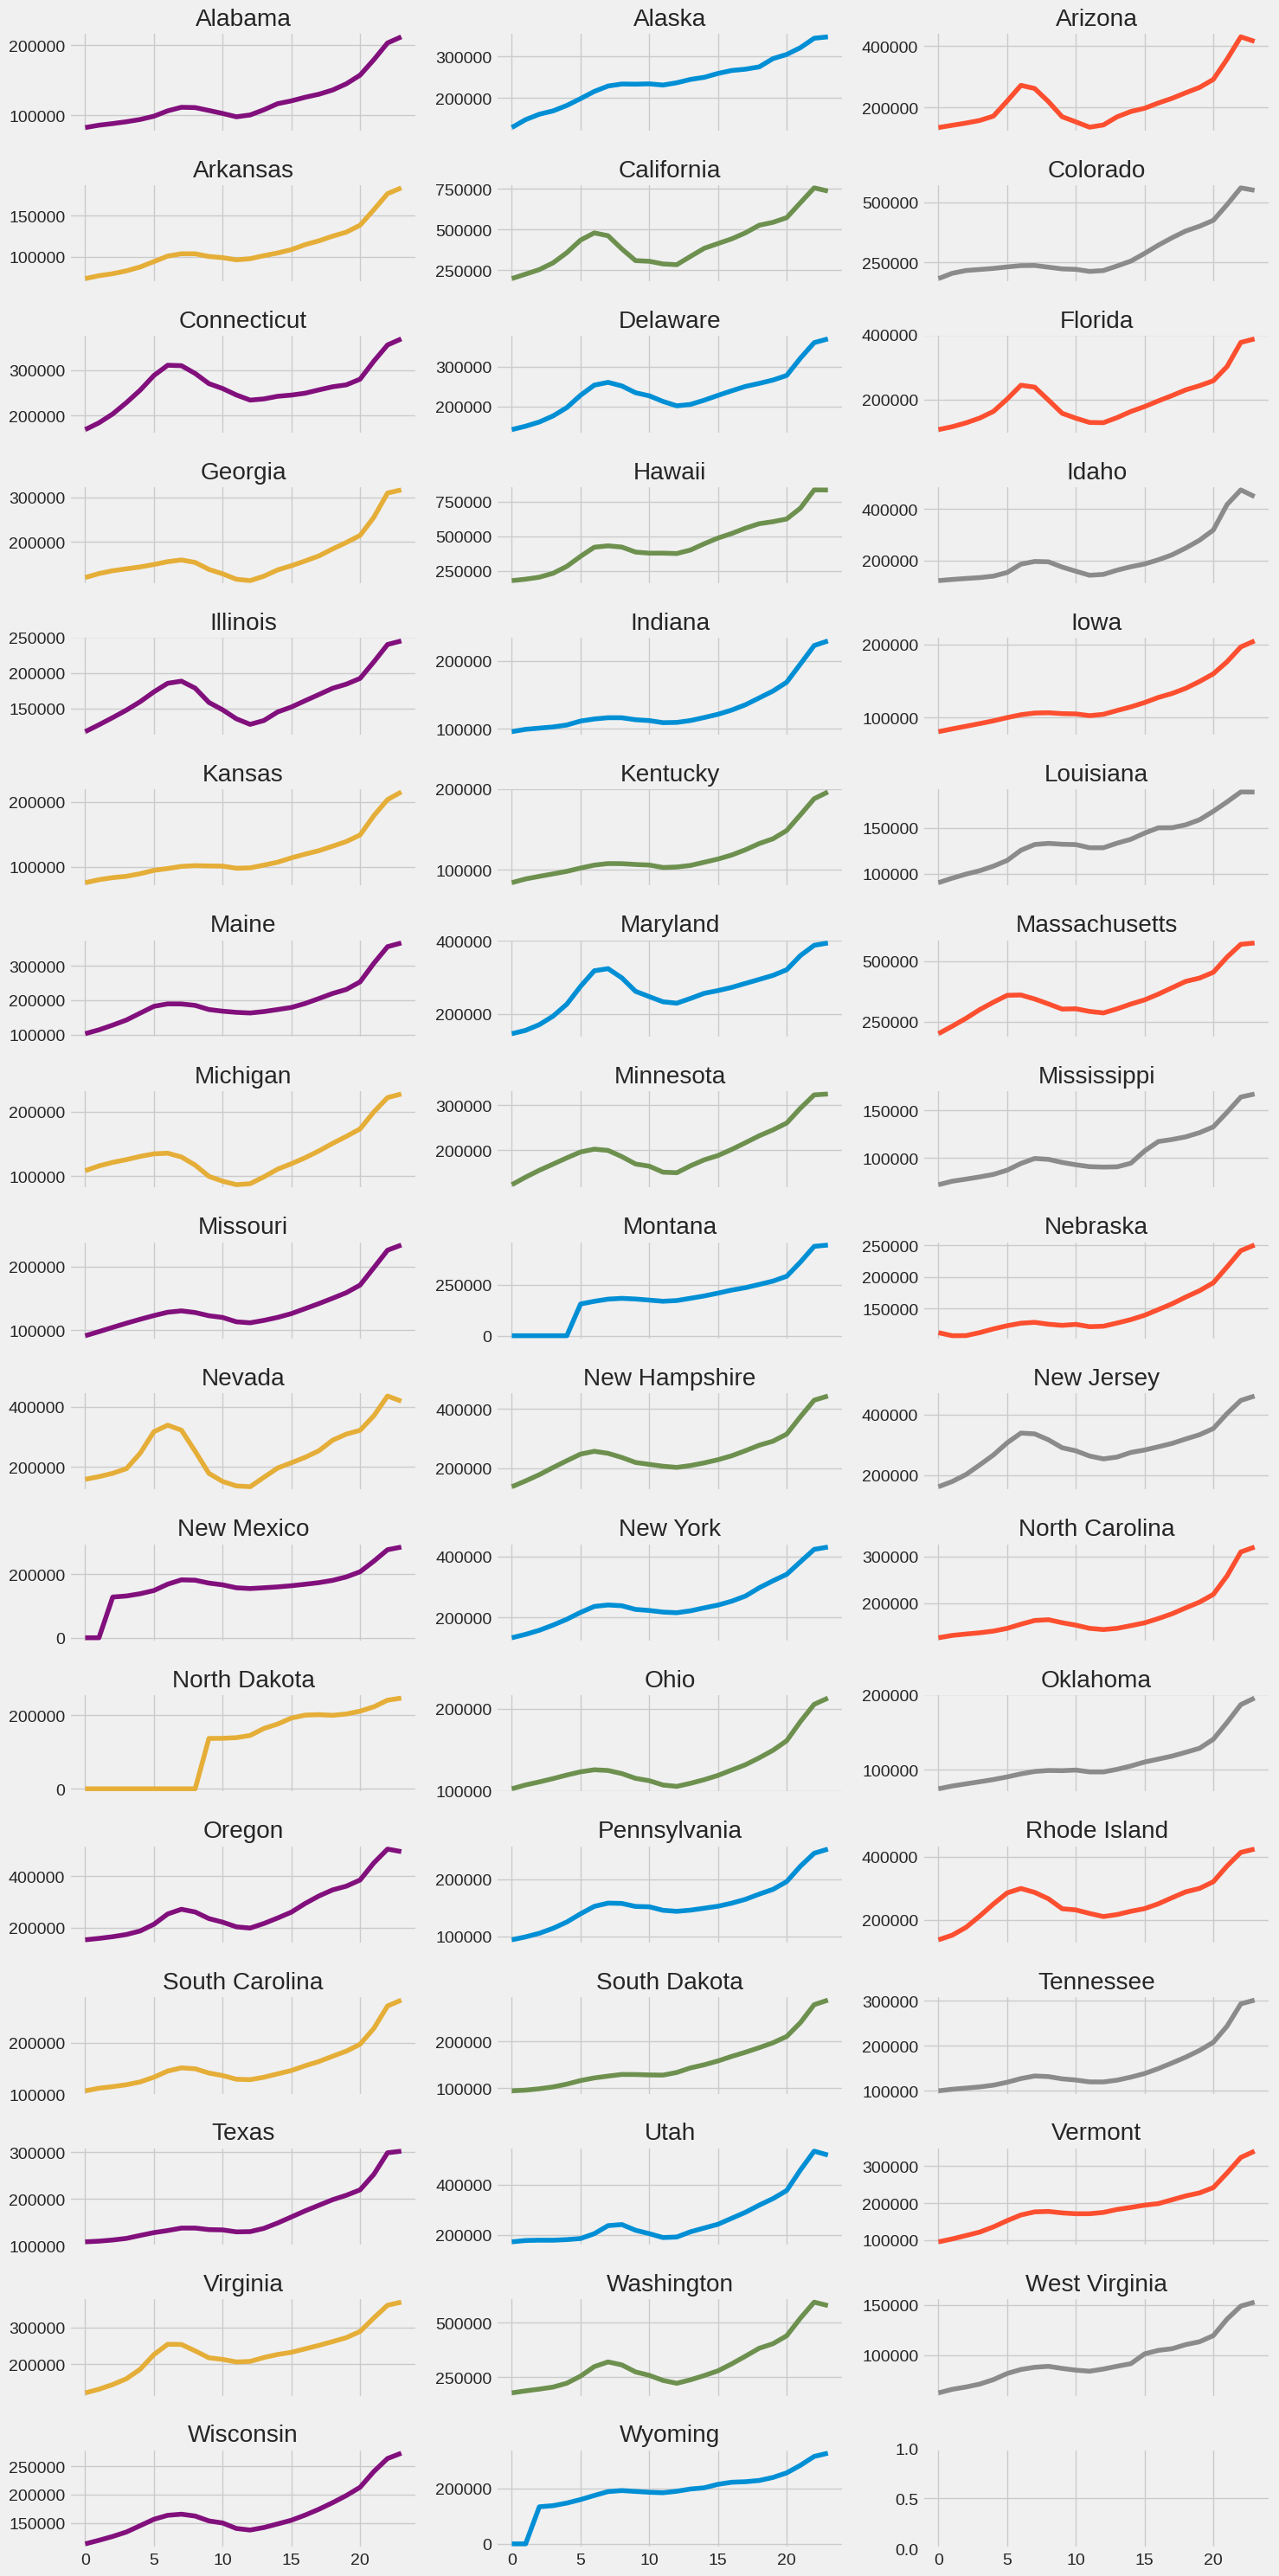

In [ ]:
fig, axs = plt.subplots(17, 3, figsize=(15, 30), sharex=True, sharey=False)
axs = axs.flatten()

for i, state in enumerate(zstate.columns[1:51]):
    zstate[state].plot(title=state,
                       color=next(color_cycle),
                       ax=axs[i]
                      )
plt.tight_layout()
plt.show()

# What is Possible
- Use this data as a feature for a different dataset.
- Link this data with other information about the state like poverty, cost of living, etc.
- How did price change in states after Covid?
- Where are the biggest dips and increases for each state?